# Limiarização local

Dada uma imagem possuindo variação de luminosidade, aplicaremos limiarização local para gerar uma imagem binária. Mas primeiro faremos um teste utilizando limiarização global.

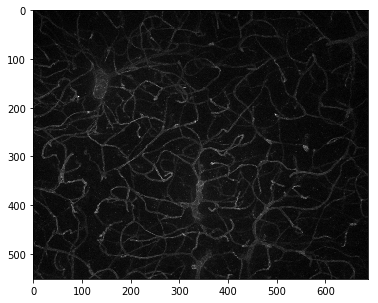

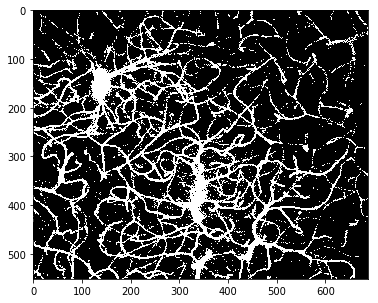

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('vasos.tiff')
img_bin = img>25
plt.figure(figsize=[6, 6])
plt.imshow(img, 'gray')
plt.figure(figsize=[6, 6])
plt.imshow(img_bin, 'gray')

Note que a imagem binária resultante possui alguns vasos que sumiram (em regiões escuras) e outros que foram segmentados junto com o background (em regiões mais iluminadas). É muito difícil corrigir esses artefatos após a limiarização.

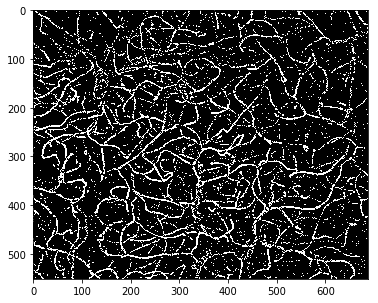

In [2]:
def threshold_local(img, radius, threshold, threshold_global=0):
    '''Aplica limiarização local em uma imagem. 'radius' define o tamanho da vizinhança
       que será considerada. Pixels possuindo valor maior que a média da vizinhança
       mais 'threshold' são considerados foreground. Opcionalmente, podemos considerar
       uma condição adicional de que o pixel pode ser foreground apenas se o seu valor
       na imagem for maior que 'threshold_global' '''     
        
    num_rows, num_cols = img.shape
    img_bin = np.zeros((num_rows, num_cols))
    for row in range(num_rows):
        for col in range(num_cols):
            # Limites da vizinhança do pixel, tomando cuidado para
            # não ultrapassar as bordas da imagem
            first_row = max([row-radius, 0])
            first_col = max([col-radius, 0])
            last_row = min([row+radius, num_rows])
            last_col = min([col+radius, num_cols])
                
            # Obtém vizinhança do pixel (row, col)
            img_patch = img[first_row:last_row, first_col:last_col]
            
            mean_intensity_patch = np.mean(img_patch)
            img_corr = img[row, col] - mean_intensity_patch
            if img_corr>=threshold and img[row, col]>=threshold_global:
                img_bin[row, col] = 1
    
    return img_bin          
            
img_bin = threshold_local(img, radius=5, threshold=5, threshold_global=0)
plt.figure(figsize=[6, 6])
plt.imshow(img_bin, 'gray')
    

A segmentação ainda não está perfeita, mas agora os problemas de segmentação ocorrem de forma homogênea ao longo da imagem, o que torna a correção deles mais simples.